In [36]:
# Importing important library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# load the data
data= pd.read_csv('train.csv')

In [38]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [39]:
data.shape

(550068, 12)

In [40]:
# check null value
data.isna().sum()/len(data)

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

In [41]:
data.columns= data.columns.str.lower()

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

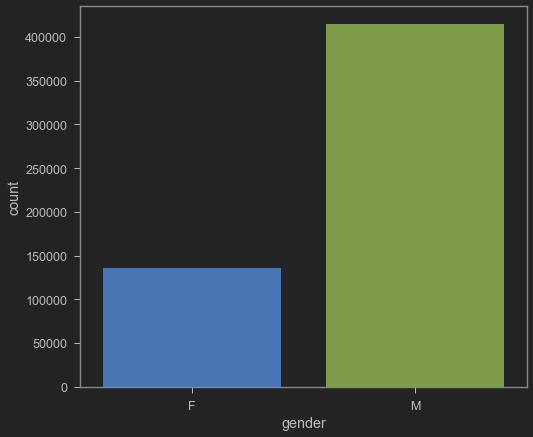

In [42]:
sns.countplot(data['gender'])

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

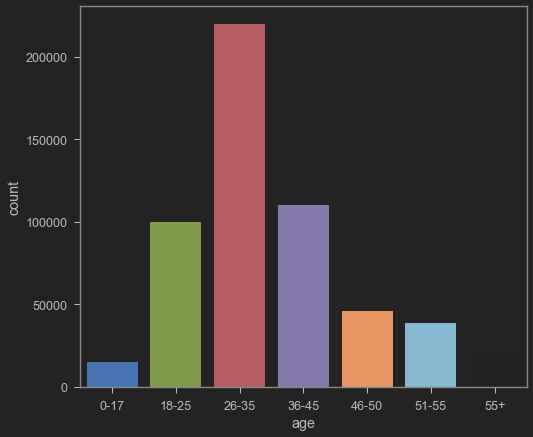

In [43]:
sns.countplot(data['age'], order= sorted(data['age'].unique()))

In [44]:
data.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city_category', ylabel='count'>

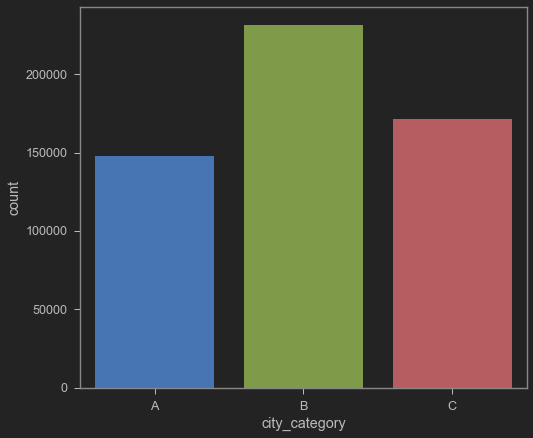

In [45]:
sns.countplot(data['city_category'], order= sorted(data['city_category'].unique()))

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stay_in_current_city_years', ylabel='count'>

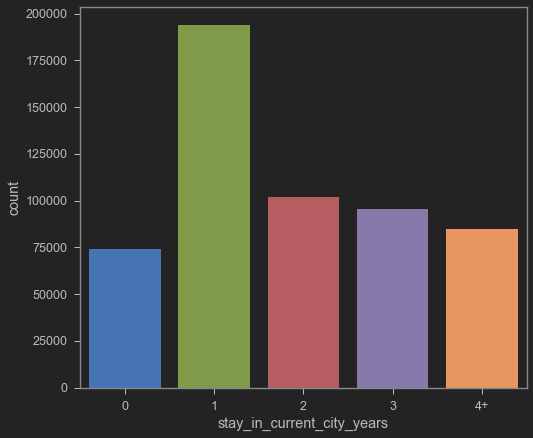

In [46]:
sns.countplot(data['stay_in_current_city_years'], order= sorted(data['stay_in_current_city_years'].unique()))

In [47]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_id,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
marital_status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
product_category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
product_category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
product_category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [48]:
# fil null value based on median of each column
data['product_category_2'] = data['product_category_2'].fillna(data['product_category_2'].quantile(0.5))
data['product_category_3'] = data['product_category_3'].fillna(data['product_category_3'].quantile(0.5))

In [49]:
data.isna().any()

user_id                       False
product_id                    False
gender                        False
age                           False
occupation                    False
city_category                 False
stay_in_current_city_years    False
marital_status                False
product_category_1            False
product_category_2            False
product_category_3            False
purchase                      False
dtype: bool

In [50]:
data.select_dtypes('object')

,product_id,gender,age,city_category,stay_in_current_city_years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+
...,...,...,...,...,...
550063,P00372445,M,51-55,B,1
550064,P00375436,F,26-35,C,3
550065,P00375436,F,26-35,B,4+
550066,P00375436,F,55+,C,2


In [51]:
# convert categorical value into dummy variable
dummy = pd.get_dummies(data.select_dtypes('object').iloc[:,1:])
dummy.shape

(550068, 17)

In [52]:
data.shape

(550068, 12)

In [53]:
# combine the dummy variable with data
data= data.join(dummy)

In [54]:
data.tail()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,...,age_51-55,age_55+,city_category_A,city_category_B,city_category_C,stay_in_current_city_years_0,stay_in_current_city_years_1,stay_in_current_city_years_2,stay_in_current_city_years_3,stay_in_current_city_years_4+
550063,1006033,P00372445,M,51-55,13,B,1,1,20,9.0,...,1,0,0,1,0,0,1,0,0,0
550064,1006035,P00375436,F,26-35,1,C,3,0,20,9.0,...,0,0,0,0,1,0,0,0,1,0
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,9.0,...,0,0,0,1,0,0,0,0,0,1
550066,1006038,P00375436,F,55+,1,C,2,0,20,9.0,...,0,1,0,0,1,0,0,1,0,0
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,9.0,...,0,0,0,1,0,0,0,0,0,1


In [55]:
data.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase', 'gender_F',
       'gender_M', 'age_0-17', 'age_18-25', 'age_26-35', 'age_36-45',
       'age_46-50', 'age_51-55', 'age_55+', 'city_category_A',
       'city_category_B', 'city_category_C', 'stay_in_current_city_years_0',
       'stay_in_current_city_years_1', 'stay_in_current_city_years_2',
       'stay_in_current_city_years_3', 'stay_in_current_city_years_4+'],
      dtype='object')

In [56]:
# drop unnecessary columns
data.drop(['gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years'], axis=1, inplace= True)

In [57]:
data.shape

(550068, 24)

In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [59]:
x= data.drop(['user_id', 'product_id','purchase'], axis=1)
y= data['purchase']

In [60]:
x.shape

(550068, 21)

In [61]:
y.shape

(550068,)

In [62]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

In [63]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print('r2 score:', r2_score(y_test,pred))

r2 score: 0.5872819020718285


In [64]:
scaler= MinMaxScaler(feature_range=(0,1))

In [65]:
# scaling the data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [66]:
# creating model
models= []
models.append(('LinearRegression', LinearRegression()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('XGBRegressor', XGBRegressor()))
models.append(('RandomForest', RandomForestRegressor()))

In [68]:
# Fitting model
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    
    print(r2_score(y_true=y_test, y_pred= predictions))
    print(mean_squared_error(y_true=y_test, y_pred= predictions))
    print('\n')

LinearRegression
0.12935289493406732
21996457.566652782


DecisionTreeRegressor
0.6257761030548428
9454576.971180795


XGBRegressor
0.6646137843322565
8473362.64997643


RandomForest
0.6418410872581166
9048703.292534038




In [69]:
# Importing tensorflow model
import tensorflow
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential

In [70]:
model = Sequential()

model.add(Dense(21,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [71]:
model.fit(x=x_train,y=y_train.values,
          validation_data=(x_test,y_test.values),
          batch_size=128, epochs=400, verbose=0)

<AxesSubplot:>

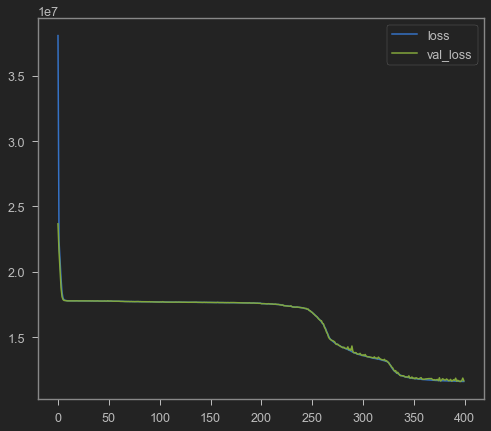

In [72]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [73]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [74]:
predictions = model.predict(x_test)
mean_absolute_error(y_test,predictions)

2491.4847901105313

In [75]:
np.sqrt(mean_squared_error(y_test,predictions))

3413.759096881706

In [76]:
explained_variance_score(y_test,predictions)

0.5411005936082098

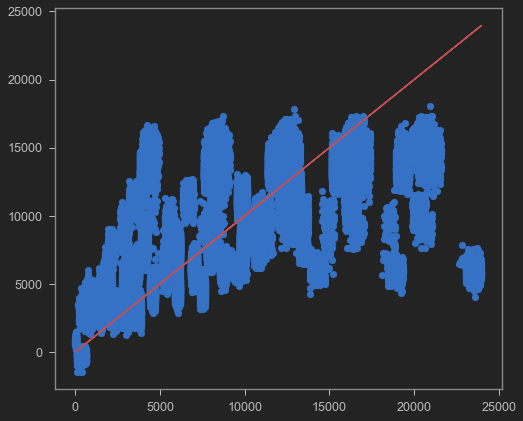

In [77]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [78]:
test_data = pd.read_csv('test.csv')

In [79]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [80]:
test_data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [81]:
test_data = test_data.fillna(0)

In [82]:
dummies = pd.get_dummies(test_data.select_dtypes('object').iloc[:,1:])

In [83]:
dummies.shape

(233599, 17)

In [84]:
test_data.shape

(233599, 11)

In [85]:
test_data = test_data.join(dummies)

In [86]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,...,0,0,0,1,0,0,0,1,0,0
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,...,0,0,0,0,1,1,0,0,0,0
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,...,0,0,0,1,0,0,0,0,0,1
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,...,0,0,0,1,0,0,0,0,0,1
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,...,0,0,0,0,1,0,1,0,0,0


In [87]:
test_id = test_data[['User_ID', 'Product_ID']]
test_data.drop(['User_ID', 'Product_ID'], axis=1, inplace= True)

In [88]:
test_data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,M,46-50,7,B,2,1,1,11.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
1,M,26-35,17,C,0,0,3,5.0,0.0,0,...,0,0,0,0,1,1,0,0,0,0
2,F,36-45,1,B,4+,1,5,14.0,0.0,1,...,0,0,0,1,0,0,0,0,0,1
3,F,36-45,1,B,4+,1,4,9.0,0.0,1,...,0,0,0,1,0,0,0,0,0,1
4,F,26-35,1,C,1,0,4,5.0,12.0,1,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,F,26-35,15,B,4+,1,8,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,1
233595,F,26-35,15,B,4+,1,5,8.0,0.0,1,...,0,0,0,1,0,0,0,0,0,1
233596,F,26-35,15,B,4+,1,1,5.0,12.0,1,...,0,0,0,1,0,0,0,0,0,1
233597,F,46-50,1,C,4+,0,10,16.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1


In [89]:
test_data.drop(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years'], axis=1, inplace= True)

In [90]:
x.columns

Index(['marital_status', 'product_category_1', 'product_category_2',
       'product_category_3', 'gender_F', 'gender_M', 'age_0-17', 'age_18-25',
       'age_26-35', 'age_36-45', 'age_46-50', 'age_51-55', 'age_55+',
       'city_category_A', 'city_category_B', 'city_category_C',
       'stay_in_current_city_years_0', 'stay_in_current_city_years_1',
       'stay_in_current_city_years_2', 'stay_in_current_city_years_3',
       'stay_in_current_city_years_4+'],
      dtype='object')

In [91]:
test_data.columns

Index(['Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Gender_F', 'Gender_M', 'Age_0-17', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'City_Category_A', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+'],
      dtype='object')

In [92]:
test_data = scaler.transform(test_data)

In [106]:
# predict test data using XGBRegressor (higher r2_score than other)
pred = abs(models[2][1].predict(test_data))

In [107]:
print(pred)

[13564.778  13417.379   7725.544  ... 13550.875  17669.568   5042.7183]


In [108]:
test_id['Purchase'] = pd.Series(pred)

<ipython-input-108-a735976c6b33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_id['Purchase'] = pd.Series(pred)


In [109]:
test_id

,User_ID,Product_ID,Purchase
0,1000004,P00128942,13564.778320
1,1000009,P00113442,13417.378906
2,1000010,P00288442,7725.543945
3,1000010,P00145342,4263.041992
4,1000011,P00053842,2783.747803
...,...,...,...
233594,1006036,P00118942,9009.876953
233595,1006036,P00254642,7534.184570
233596,1006036,P00031842,13550.875000
233597,1006037,P00124742,17669.568359


In [110]:
test_id.to_csv('submission.csv', index=False)

In [111]:
test_id.describe()

,User_ID,Purchase
count,2.335990e+05,233599.000000
mean,1.003029e+06,9632.143555
std,1.726505e+03,4226.453125
min,1.000001e+06,0.778288
25%,1.001527e+06,6560.020020
50%,1.003070e+06,8441.985352
75%,1.004477e+06,13500.698242
max,1.006040e+06,24332.765625
